In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [13]:
import rompy as rp

In [14]:
def gen_data(x):
    x0, x1, x2 = np.meshgrid(x, x, x)
    x0 = x0.ravel()
    x1 = x1.ravel()
    x2 = x2.ravel()
    z = np.sin(5 * x0) + .4 * np.sin(x1) + .2 * np.sin(x2)
    return x0, x1, x2, z

In [15]:
x = np.linspace(0, 1, 10)
x0, x1, x2, z = gen_data(x)

In [16]:
# validation set
x_val = np.linspace(0, 1, 20)
x0_val, x1_val, x2_val, z_val = gen_data(x_val)

In [17]:
plt.figure()
plt.scatter(range(len(z)), z)

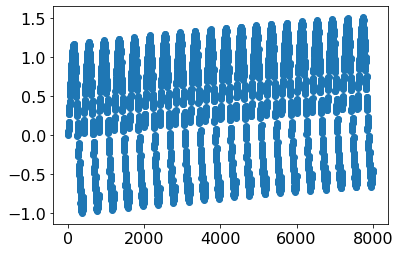

In [18]:
plt.figure()
plt.scatter(range(len(z_val)), z_val)

In [19]:
def polyfit3d_interpolant(x0,x1,x2,z1,deg):
    interpolant = rp.MultivariateFits([x0,x1,x2], z1, fit='polyfit3d', deg=deg)
    return interpolant

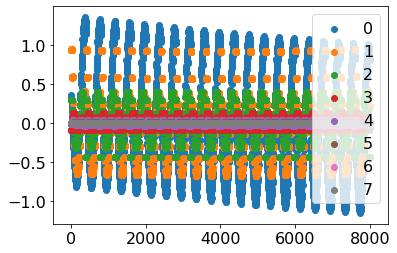

In [20]:
plt.figure()
degs = range(8)
for deg in degs:
    rp_int = polyfit3d_interpolant(x0, x1, x2, z, deg=deg)
    prediction = rp_int([x0_val, x1_val, x2_val])
    
    plt.scatter(range(len(z_val)), prediction - z_val, label=deg)
plt.legend()
plt.show()
plt.close()

In [21]:
%%timeit
rp_int([x0_val, x1_val, x2_val])

14.9 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
rp_int([np.array([1.]),np.array([1.]),np.array([1.])])

695 µs ± 6.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
